# 📊 Análise Exploratória de Transporte Ferroviário de Cargas

Este notebook tem como objetivo explorar uma base de dados contendo registros mensais  
de transporte ferroviário de cargas no Brasil, classificados por ano, mês e grupo de mercadoria.

---

## 🎯 Objetivos

- Obter uma visão geral da estrutura e conteúdo dos dados.
- Calcular os totais de carga transportada por ano.
- Analisar a participação de cada grupo de mercadoria no transporte ferroviário.
- Identificar tendências e padrões ao longo do tempo.
- Gerar estatísticas descritivas básicas (média, mediana, desvio padrão, etc.).

---

Essa análise é útil tanto para fins acadêmicos quanto para aplicações práticas em:

- Logística e planejamento de transporte;
- Políticas públicas de infraestrutura;
- Modelagem e previsão de demanda;
- Estudos de desempenho e eficiência ferroviária.

---

## 🧰 Bibliotecas utilizadas

- **pandas**: manipulação e agregação de dados;
- **numpy**: cálculos estatísticos básicos;
- **matplotlib** / **seaborn**: visualizações gráficas.

---

## 🗂️ Fonte dos dados

- Dados públicos sobre o transporte ferroviário de carga,  
  por grupo de mercadoria e período (mês/ano).

---


In [43]:
#Importando as bibliotecas que serão utilizadas no ínicio dessa análise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Imprimindo a versão de cada biblioteca
print ('A versão do Pandas utilizada nesse Jupyter notebook é,', pd.__version__)
print ('A versão do Numpy utilizada nesse Jupyter notebook é', np.__version__)
print ('A versão do Matplotlib utilizada nesse Jupter notebook é', plt.__version__)

A versão do Pandas utilizada nesse Jupyter notebook é, 2.3.0
A versão do Numpy utilizada nesse Jupyter notebook é 1.26.4
A versão do Matplotlib utilizada nesse Jupter notebook é 3.8.0


In [3]:
#Carregando o csv para um dataframe do pandas
df = pd.read_csv('transporte_ferroviario.csv')

In [4]:
#Exbibindo as primeiras linhas do df
df.head()

,Ano,Mês,Grupo Mercadoria,Carga Ferroviária
0,2006,1,"Combustíveis, Derivados do Petróleo e Álcool",716079
1,2006,1,"Indústria Siderúrgica, Cimento e Construção Civil",4115401
2,2006,1,"Setor Agrícola, Extração Vegetal e Celulose",2151686
3,2006,1,Minério de Ferro,23682391
4,2006,1,Outras Mercadorias,475936


In [5]:
#Verificando se dentro do dataframe existe algum valor ausente (NaN)
df.isna().any().any()

False

In [6]:
#Verificando tipos de dados e estrutura
9.sumdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ano                1160 non-null   int64 
 1   Mês                1160 non-null   int64 
 2   Grupo Mercadoria   1160 non-null   object
 3   Carga Ferroviária  1160 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 36.4+ KB


In [7]:
#Verificando as estatísticas descritivas das colunas númericas
df.describe()

,Ano,Mês,Carga Ferroviária
count,1160.000000,1160.000000,1.160000e+03
mean,2015.172414,6.431034,7.928936e+06
std,5.586060,3.466154,1.120979e+07
min,2006.000000,1.000000,1.871560e+05
25%,2010.000000,3.000000,7.114040e+05
50%,2015.000000,6.000000,3.213658e+06
75%,2020.000000,9.000000,6.912815e+06
max,2025.000000,12.000000,4.080580e+07


In [10]:
#Verifica se há valores duplicados
df.duplicated().sum()

0

In [11]:
#Verificando se há espaços extras ou inconsistências em strings
df ['Grupo Mercadoria'].unique()

array(['Combustíveis, Derivados do Petróleo e Álcool',
       'Indústria Siderúrgica, Cimento e Construção Civil',
       'Setor Agrícola, Extração Vegetal e Celulose', 'Minério de Ferro',
       'Outras Mercadorias'], dtype=object)

In [12]:
#Total de carga ferroviária por ano 
df.groupby('Ano')['Carga Ferroviária'].sum()

Ano
2006    389112863
2007    414925023
2008    426520007
2009    379441316
2010    435248372
2011    454380212
2012    453199596
2013    450692632
2014    465880887
2015    492826108
2016    505184195
2017    540237780
2018    571621071
2019    494288658
2020    489619011
2021    506796406
2022    500778260
2023    530811918
2024    540563225
2025    155438376
Name: Carga Ferroviária, dtype: int64

In [13]:
#Agrupa os dados por grupo de mercadoria, soma o total de carga transportada em todo o período e ordena os resultados
#do maior para o menor volume transportado
df.groupby('Grupo Mercadoria')['Carga Ferroviária'].sum().sort_values(ascending=False)

Grupo Mercadoria
Minério de Ferro                                     6862556437
Setor Agrícola, Extração Vegetal e Celulose          1262224639
Indústria Siderúrgica, Cimento e Construção Civil     811531591
Combustíveis, Derivados do Petróleo e Álcool          178144093
Outras Mercadorias                                     83109156
Name: Carga Ferroviária, dtype: int64

## Análise de Sazonalidade da Carga Ferroviária - Últimos 10 anos

Nesta seção, vamos explorar a sazonalidade dos dados de carga ferroviária no Brasil ao longo dos últimos 10 anos. A sazonalidade refere-se a padrões que se repetem em intervalos regulares, como variações mensais recorrentes influenciadas por fatores econômicos, climáticos ou operacionais.

### Objetivos e etapas do processo:

1. **Filtrar os dados para os últimos 10 anos**  
   Restringiremos o conjunto de dados para focar em um período recente e relevante, garantindo que a análise reflita as tendências atuais.

2. **Agregação mensal dos dados**  
   Somaremos a carga ferroviária por mês e ano para consolidar as informações em uma série temporal mensal.

3. **Visualização da série temporal mensal**  
   Plotaremos a evolução da carga ao longo do tempo para identificar tendências, picos e quedas.

4. **Cálculo da média mensal ao longo dos anos**  
   Calcularemos a média da carga para cada mês ao longo dos 10 anos para revelar padrões sazonais típicos (exemplo: meses que historicamente têm maior ou menor volume).

5. **Decomposição da série temporal**  
   Aplicaremos técnicas de decomposição para separar a série em componentes de tendência, sazonalidade e ruído, permitindo uma análise mais detalhada dos padrões.

Esta análise ajudará a entender os ciclos e variações previsíveis no transporte ferroviário, auxiliando no planejamento e na tomada de decisões estratégicas.



In [25]:
#Descobrindo qual o ano mais recente na base de dados
ano_atual = df['Ano'].max()
#Imprimindo o ano atual
print (ano_atual)

2025


In [31]:
#Filtrando os dados para pegar os últimos 10 anos
inicio = ano_atual - 9
df_10anos = df [(df ['Ano']>= inicio) & (df['Ano']<= ano_atual)]
#Exibindo quantos registros ficaram:
print (df_10anos)

       Ano  Mês                                   Grupo Mercadoria  \
600   2016    1                                   Minério de Ferro   
601   2016    1  Indústria Siderúrgica, Cimento e Construção Civil   
602   2016    1                                 Outras Mercadorias   
603   2016    1       Combustíveis, Derivados do Petróleo e Álcool   
604   2016    1        Setor Agrícola, Extração Vegetal e Celulose   
...    ...  ...                                                ...   
1155  2025    4       Combustíveis, Derivados do Petróleo e Álcool   
1156  2025    4  Indústria Siderúrgica, Cimento e Construção Civil   
1157  2025    4        Setor Agrícola, Extração Vegetal e Celulose   
1158  2025    4                                   Minério de Ferro   
1159  2025    4                                 Outras Mercadorias   

      Carga Ferroviária  
600            30144304  
601             2955430  
602              263899  
603              677907  
604             3619980  
...

In [35]:
#Agrupando os dados por Ano e Mês para somar a carga total de todos os grupos de marcadoria.
#Isso irá gerar uma série temporal com uma linha por mês, contendo o total transportado naquele mês
df_mensal = df_10anos.groupby(['Ano', 'Mês'])['Carga Ferroviária'].sum().reset_index()

#Renomeando a coluna para indicar que agora é a carga total mensal
df_mensal.rename(columns={'Carga Ferroviária': 'Carga_Total'}, inplace= True)

#Visualizando as primeiras linhas do resultado
print (df_mensal.head())

    Ano  Mês  Carga_Total
0  2016    1     37661520
1  2016    2     37645470
2  2016    3     41611644
3  2016    4     42146218
4  2016    5     43262761


In [38]:
#Criando a coluna 'Data' a partir de 'Ano' e 'Mês'
#Vamos definir o dia como '1', pois só  irá nos interessar o mês. 
df_mensal['Data'] = pd.to_datetime(df_mensal['Ano'].astype(str) + '-' + df_mensal['Mês'].astype(str).str.zfill(2) + '-01')

#Reorganizando o DataFrame para colocar 'Data' como índice
df_mensal.set_index('Data', inplace=True)

#Conferindo o resultado 
print (df_mensal.head())

             Ano  Mês  Carga_Total
Data                              
2016-01-01  2016    1     37661520
2016-02-01  2016    2     37645470
2016-03-01  2016    3     41611644
2016-04-01  2016    4     42146218
2016-05-01  2016    5     43262761


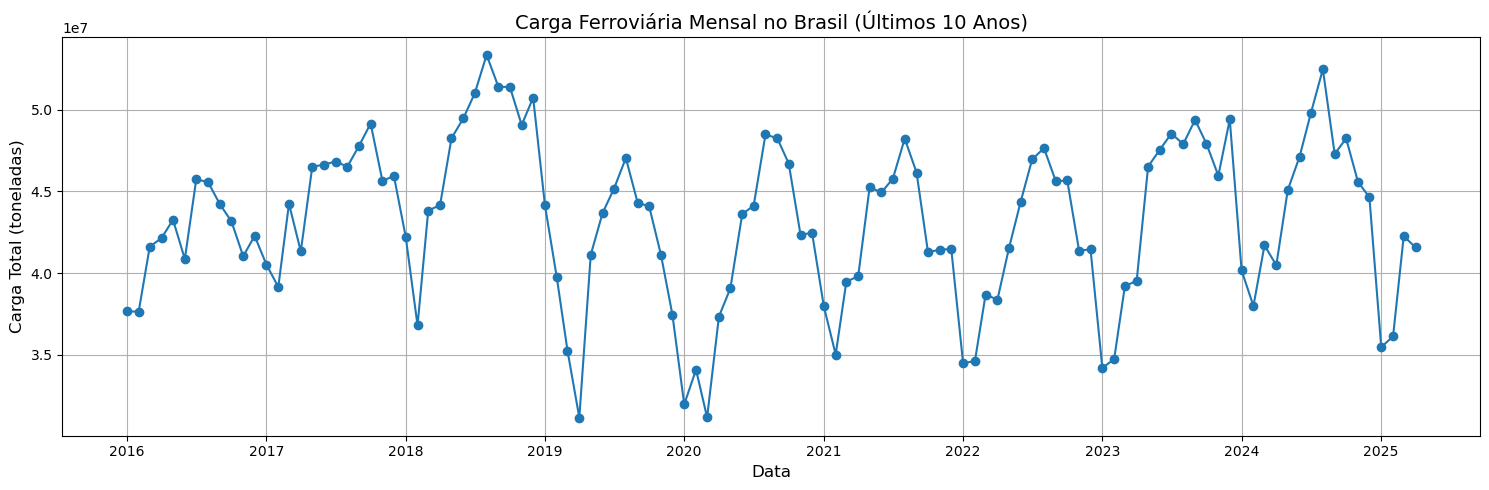

In [44]:
# Criando o gráfico de linha com a carga total mensal
plt.figure(figsize=(15, 5))
plt.plot(df_mensal.index, df_mensal['Carga_Total'], marker='o', linestyle='-')

# Títulos e rótulos
plt.title('Carga Ferroviária Mensal no Brasil (Últimos 10 Anos)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Carga Total (toneladas)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
#Agrupando por mês e calculando a média de carga total de cada mês ao longo dos anos 
media_mensal = df_mensal.groupby(df_mensal.index.month)['Carga_Total'].mean()

#Renomeando o índice para exibir os nomes dos meses no gŕafico
nome_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
media_mensal.index = nome_meses

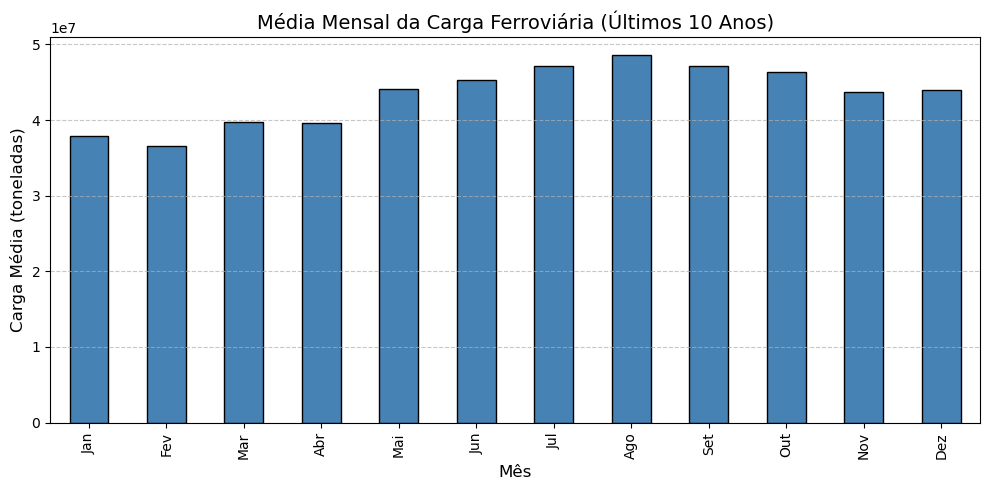

In [46]:
# Visualizando a média mensal com um gráfico de barras
plt.figure(figsize=(10, 5))
media_mensal.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Média Mensal da Carga Ferroviária (Últimos 10 Anos)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Carga Média (toneladas)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Análise: Grupo de Mercadoria Mais Transportado (Últimos 10 Anos)

Agora que analisamos a sazonalidade geral da carga ferroviária, vamos entender **quais tipos de mercadorias** mais contribuíram para esse volume nos últimos 10 anos.

### Objetivo:
Identificar quais grupos de mercadoria foram mais movimentados no transporte ferroviário brasileiro entre 2016 e 2025, em termos de volume total.

### Etapas:
1. Utilizar o DataFrame filtrado com os dados dos últimos 10 anos (`df_10anos`).
2. Agrupar os dados por **Grupo de Mercadoria**, somando o volume total transportado.
3. Ordenar os resultados do maior para o menor volume.
4. Visualizar os dados com um gráfico de barras para facilitar a comparação.

Essa análise ajuda a entender o papel estratégico de certos setores — como mineração, agricultura ou combustíveis — no uso da malha ferroviária nacional.


In [49]:
#Agrupando o total transportado por grupo de mercadoria nos últimos 10 anos
grupo_total = df_10anos.groupby('Grupo Mercadoria')['Carga Ferroviária'].sum().sort_values(ascending=False)

#Exibindo os resultados
print (grupo_total)

Grupo Mercadoria
Minério de Ferro                                     3591954164
Setor Agrícola, Extração Vegetal e Celulose           771950869
Indústria Siderúrgica, Cimento e Construção Civil     343178121
Combustíveis, Derivados do Petróleo e Álcool           79665583
Outras Mercadorias                                     48590163
Name: Carga Ferroviária, dtype: int64


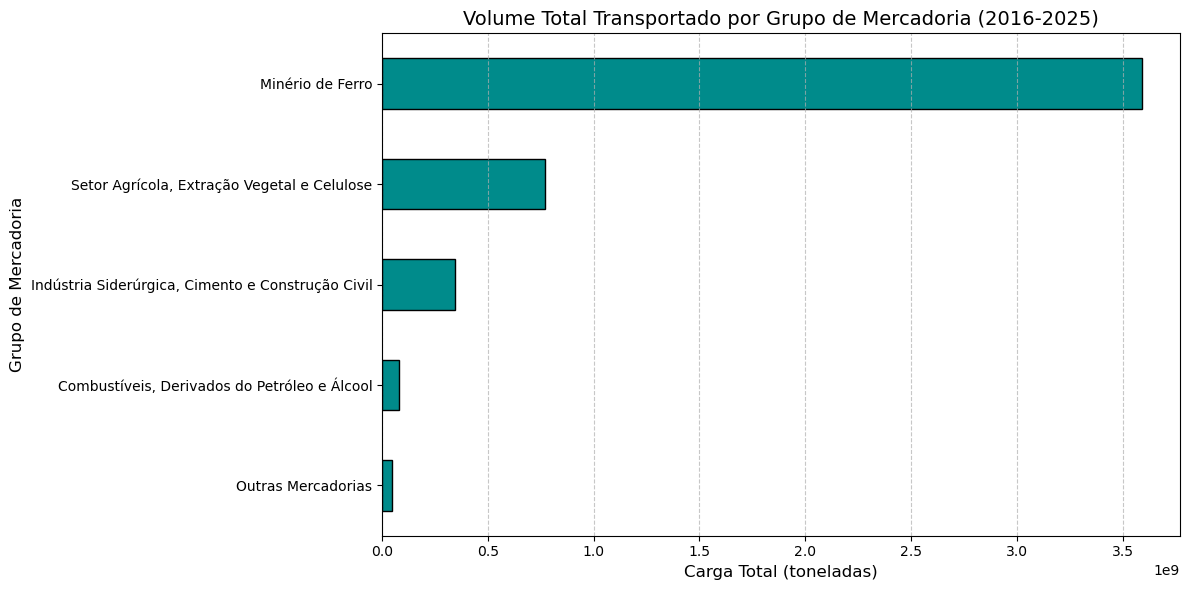

In [50]:
plt.figure(figsize=(12, 6))
grupo_total.plot(kind='barh', color='darkcyan', edgecolor='black')

plt.title('Volume Total Transportado por Grupo de Mercadoria (2016-2025)', fontsize=14)
plt.xlabel('Carga Total (toneladas)', fontsize=12)
plt.ylabel('Grupo de Mercadoria', fontsize=12)
plt.gca().invert_yaxis()  # Para mostrar o maior no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 📊 Total de Carga Ferroviária Acumulado em 2025

Filtrando o DataFrame para incluir apenas os registros do ano de **2025**  
e, em seguida, somando os valores da coluna **"Carga Ferroviária"**  
para obter o **total acumulado transportado até o momento (abril)**.


In [36]:
#Filtra os registros de 2025
df_2025 = df[df['Ano']== 2025]
#Soma o total de carga ferroviária de 2025
total_2025 = df_2025 ['Carga Ferroviária'].sum()
#Exibe o resultado
print ("Total de carga ferroviária em 2025 até o momento é", total_2025)

Total de carga ferroviária em 2025 até o momento é 155438376


### 📈 Projeção da Carga Ferroviária Total de 2025

Com base nos dados disponíveis de 2025, este bloco estima a carga total ferroviária até dezembro.

A projeção utiliza a **média mensal atual** de carga transportada e a multiplica pelo número de **meses restantes no ano**.  
Esse valor estimado é então somado ao **total já registrado até o momento**, gerando uma previsão simples e direta para o total anual de 2025.

> ⚠️ Observação: esta projeção assume que a média mensal se mantém constante até o final do ano, desconsiderando possíveis variações sazonais.


In [19]:
#Obter quantos meses de 2025 já estão registrados
meses_registrados = df_2025['Mês'].nunique()
print (meses_registrados)

4


In [20]:
#Soma total de carga até abril de 2025
total_atual = df_2025['Carga Ferroviária'].sum()
print (total_atual)

155438376


In [21]:
#Calculando a média mensal com basenos meses disponíveis
media_mensal = total_atual / meses_registrados
print (media_mensal)

38859594.0


In [22]:
#Calculando a projeção para o restante do ao
meses_restantes = 12 - meses_registrados
projeção_restante = media_mensal * meses_restantes
print (projeção_restante)

310876752.0


In [23]:
#Soma o total atual com a projeção estimada até o final do ano
total_estimado_2025 = total_atual + projeção_restante
#Imprimindo o resultado
print (f'A projeção de carga a serem transportadas pelas ferrovias brasileiras até dezembro de 2025 é: {total_estimado_2025:,.0f} toneladas)')

A projeção de carga a serem transportadas pelas ferrovias brasileiras até dezembro de 2025 é: 466,315,128 toneladas)
